## Accessing Shared Fulcra Data

If a user has shared some of their data (a dataset) with you, you can access this data by using the same API calls as you would if you were accessing your own.

You'll need their Fulcra User ID.  This ID is shown in your Profile inside Portal; it's also visible on the Settings tab inside the Context app.  

You'll pass this ID as the optional `fulcra_userid` parameter to Fulcra API calls.  The functions in the `fulcra-api` Python packge have been updated to support this parameter as well. 

If you don't specify `fulcra_userid`, the library (and the underlying API calls) will retrieve your own user.

If you try to request data you don't have access to -- even if you know the other user's ID -- you'll get an error.

In [1]:
%pip install -qU fulcra-api

Note: you may need to restart the kernel to use updated packages.


In [25]:
from fulcra_api.core import FulcraAPI
import matplotlib.pyplot as plt
import seaborn as sns

fulcra = FulcraAPI()
fulcra.authorize()

### Retrieving Another User's Data

Let's retrieve step count data from a user with user ID `d64bbe9b-4902-42e9-a607-7db51ebc6379`, who has shared their data with us. 

We make a call to the [`metric_time_series` function](https://fulcradynamics.github.io/fulcra-api-python/fulcraapi/#fulcra_api.core.FulcraAPI.metric_time_series) just as we would for our own data, except we pass an additional parameter -- `fulcra_userid`:

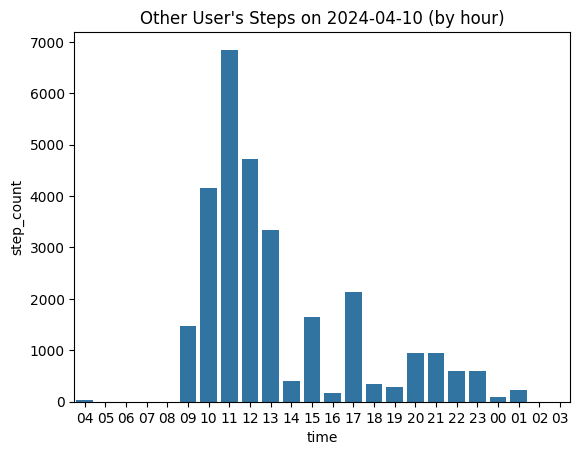

In [48]:
other_user_df = fulcra.metric_time_series(
    fulcra_userid = "d64bbe9b-4902-42e9-a607-7db51ebc6379",        # This is the user ID belonging to the user whose data you'd like to access.
    start_time = "2024-04-10 04:00:00.000Z",
    end_time = "2024-04-11 04:00:00.000Z",
    metric="StepCount"
)
other_user_hourly_totals = other_user_df.resample("h").sum()
sns.barplot(x=other_user_hourly_totals.index.strftime('%H'), y=other_user_hourly_totals['step_count'])
plt.title("Other User's Steps on 2024-04-10 (by hour)")
plt.show()

In contrast, this is the same call without the `fulcra_userid`.  This returns your own step count data from that timeframe:

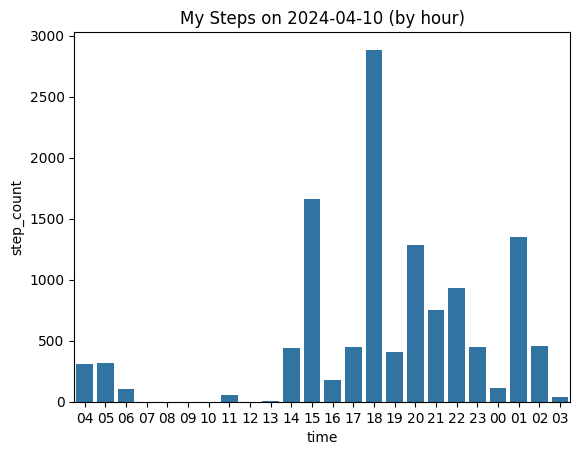

In [47]:
my_df = fulcra.metric_time_series(
    start_time = "2024-04-10 04:00:00.000Z",
    end_time = "2024-04-11 04:00:00.000Z",
    metric="StepCount"
)
my_hourly_totals = my_df.resample("h").sum()
sns.barplot(x=my_hourly_totals.index.strftime('%H'), y=my_hourly_totals['step_count'])
plt.title("My Steps on 2024-04-10 (by hour)")
plt.show()

### Other Functions Work Too

Shared data isn't limited to `metric_time_series` -- it's also available for every other data-retrieval function in the Fulcra API.  If you're working with Python, see the [documentation on the FulcraAPI class](https://fulcradynamics.github.io/fulcra-api-python/fulcraapi/) for a full list.

Enjoy!  Please reach out to anyone at Fulcra if you have any questions!